<center>Myranda Swartzwelter <br>
DSC-550 T301 Data Mining<br>
Term Project


<center>Term Project Milestone 1
<br>4/17/2022

Working in education technology, I've found that there is a growing need to be able to measure what success looks like for students, and what impacts that success. The dataset I've selected combines data from the U.S. Census Bureau and the National Center for Education Statistics to inform on K-12 enrollment, financial, and achievement data along with demographic information to analyze what factors lead to success and by what margin. I believe this analysis would be helpful for those in EdTech to benchmark their technology against by answering the question "Is our technology doing better than the standard?" I also believe the base analysis can be used to inform policy decisions by leaders in government to understand what impacts different variables have on education and what is correlated with success. Finally, I think this can be used by school boards to help understand enrollment rates for their areas and areas similar to theirs.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Load CSV
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


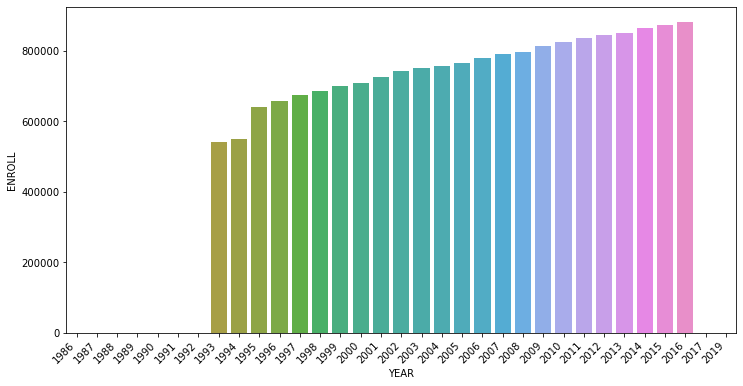

In [3]:
#Look at enrollment trends in Colorado

colorado = df.loc[df['STATE'] == 'COLORADO']

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x=colorado['YEAR'], y=colorado['ENROLL'])
ax.set_xticklabels(labels=colorado['YEAR'].sort_values().unique(), rotation=45, ha='right');


Here we see that student enrollment for colorado has been steadily increasing from 1993 to 2016. This also helps informthe analysis that there is no enrollment data for years prior to 1993 or after 2016. 

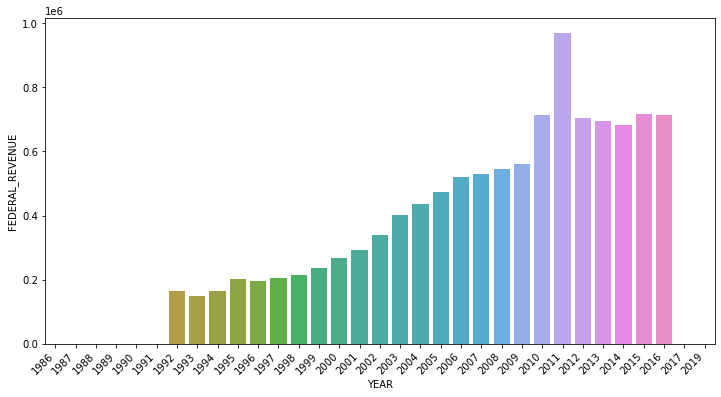

In [4]:

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x=colorado['YEAR'], y=colorado['FEDERAL_REVENUE'])
ax.set_xticklabels(labels=colorado['YEAR'].sort_values().unique(), rotation=45, ha='right');



Interestingly, Federal Revenue has increased steadily from 1992 to 2016 with a noticable spike in 2011. This is useful as we'll possibly be able to see correlations with this variable and achievement data.

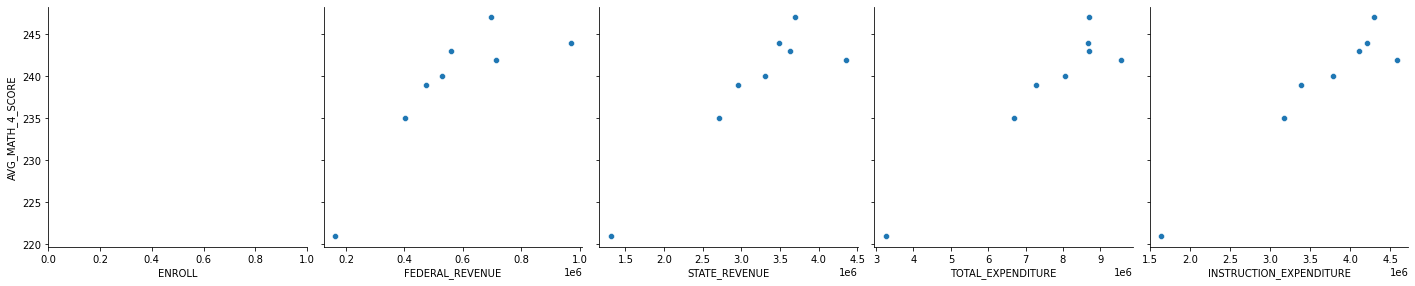

In [5]:
# Using pairplot we'll visualize the data for correlation


sns.pairplot(colorado, x_vars=['ENROLL', 'FEDERAL_REVENUE','STATE_REVENUE','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE'], 
             y_vars='AVG_MATH_4_SCORE', height=4, aspect=1, kind='scatter')
plt.show()

Based on these scatter plots, it looks like there will be correlations between test scores and revenue at the federal and state level and expenditures.

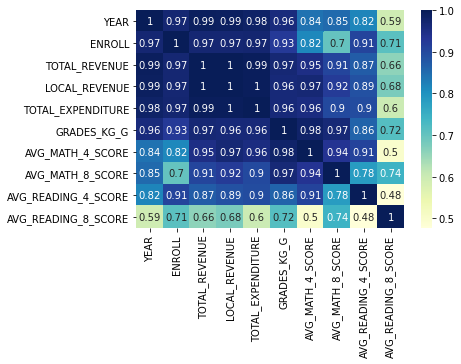

In [6]:
colorado_corr = colorado.drop(labels=['FEDERAL_REVENUE', 'STATE_REVENUE','INSTRUCTION_EXPENDITURE'
                                      ,'SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE'
                                      , 'OTHER_EXPENDITURE','GRADES_PK_G','GRADES_4_G','GRADES_8_G', 'GRADES_12_G'
                                      , 'GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G'], axis=1)

sns.heatmap(colorado_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

We see correlations for Math Scores for both 4 and 8 for Total Revenue and Total Expenditure. Interestingly, the scores do not correlate with each other, and little correlates strongly with AVG_READING_8_SCORE

In the four visualizations shown, I am better able to understand the trends and correlations in the dataset specifically for Colorado. Enrollments have been steadily increasing since 1992, and so has Federal Revenue, with an intersting spike in 2011. There appears to be several strongly correlated variables. However, since the independent variables may be related, I'll have to analyze the multicollinearity between variables in order to know which are the best to use in my analysis.

<center>Term Project Milestone 2: Data Preparation <br>
5/9/2022

In [7]:
df


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [9]:
#Step 1: find NA values and replace with the median for that state
#We will not do this for the Avg math 4 and 8 and avg reading 4 and 8 scores yet
#These are the values I want to predict for, and only a third of values in the dataset are non-null so I don't 
#want to just replace these values
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [10]:
#Testing first with enroll to make sure code is correct
df.groupby('STATE')['ENROLL'].median()

STATE
ALABAMA                  736649.0
ALASKA                   131178.0
ARIZONA                  907901.0
ARKANSAS                 459508.0
CALIFORNIA              6205883.5
COLORADO                 760853.5
CONNECTICUT              526291.5
DELAWARE                 112652.5
DISTRICT_OF_COLUMBIA      63702.5
DODEA                         NaN
FLORIDA                 2608032.0
GEORGIA                 1537591.0
HAWAII                   183397.0
IDAHO                    252909.5
ILLINOIS                2054234.0
INDIANA                 1002734.0
IOWA                     495475.0
KANSAS                   469567.5
KENTUCKY                 662334.0
LOUISIANA                719519.5
MAINE                    200169.5
MARYLAND                 851805.5
MASSACHUSETTS            931003.0
MICHIGAN                1646533.5
MINNESOTA                811598.5
MISSISSIPPI              493074.5
MISSOURI                 897849.0
MONTANA                  147360.0
NATIONAL                      NaN
NEBRASKA

In [11]:
#Use transform and a lambda function to fill na with the median grouping by state
df["ENROLL"] = df.groupby("STATE")["ENROLL"].transform(lambda x: x.fillna(x.median()))

In [12]:
df
#Looks good! Time to do it for the rest of the columns

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,736649.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,131178.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,907901.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,459508.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,6205883.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,1197366.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,1020457.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,282109.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,868615.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [13]:
df["TOTAL_REVENUE"] = df.groupby("STATE")["TOTAL_REVENUE"].transform(lambda x: x.fillna(x.median()))
df["FEDERAL_REVENUE"] = df.groupby("STATE")["FEDERAL_REVENUE"].transform(lambda x: x.fillna(x.median()))
df["STATE_REVENUE"] = df.groupby("STATE")["STATE_REVENUE"].transform(lambda x: x.fillna(x.median()))
df["LOCAL_REVENUE"] = df.groupby("STATE")["LOCAL_REVENUE"].transform(lambda x: x.fillna(x.median()))
df["TOTAL_EXPENDITURE"] = df.groupby("STATE")["TOTAL_EXPENDITURE"].transform(lambda x: x.fillna(x.median()))
df["INSTRUCTION_EXPENDITURE"] = df.groupby("STATE")["INSTRUCTION_EXPENDITURE"].transform(lambda x: x.fillna(x.median()))
df["SUPPORT_SERVICES_EXPENDITURE"] = df.groupby("STATE")["SUPPORT_SERVICES_EXPENDITURE"].transform(lambda x: x.fillna(x.median()))
df["OTHER_EXPENDITURE"] = df.groupby("STATE")["OTHER_EXPENDITURE"].transform(lambda x: x.fillna(x.median()))
df["CAPITAL_OUTLAY_EXPENDITURE"] = df.groupby("STATE")["CAPITAL_OUTLAY_EXPENDITURE"].transform(lambda x: x.fillna(x.median()))
df["GRADES_PK_G"] = df.groupby("STATE")["GRADES_PK_G"].transform(lambda x: x.fillna(x.median()))
df["GRADES_KG_G"] = df.groupby("STATE")["GRADES_KG_G"].transform(lambda x: x.fillna(x.median()))
df["GRADES_4_G"] = df.groupby("STATE")["GRADES_4_G"].transform(lambda x: x.fillna(x.median()))
df["GRADES_8_G"] = df.groupby("STATE")["GRADES_8_G"].transform(lambda x: x.fillna(x.median()))
df["GRADES_12_G"] = df.groupby("STATE")["GRADES_12_G"].transform(lambda x: x.fillna(x.median()))
df["GRADES_1_8_G"] = df.groupby("STATE")["GRADES_1_8_G"].transform(lambda x: x.fillna(x.median()))
df["GRADES_9_12_G"] = df.groupby("STATE")["GRADES_9_12_G"].transform(lambda x: x.fillna(x.median()))
df["GRADES_ALL_G"] = df.groupby("STATE")["GRADES_ALL_G"].transform(lambda x: x.fillna(x.median()))


In [14]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                            32
TOTAL_REVENUE                     32
FEDERAL_REVENUE                   32
STATE_REVENUE                     32
LOCAL_REVENUE                     32
TOTAL_EXPENDITURE                 32
INSTRUCTION_EXPENDITURE           32
SUPPORT_SERVICES_EXPENDITURE      32
OTHER_EXPENDITURE                 32
CAPITAL_OUTLAY_EXPENDITURE        32
GRADES_PK_G                       32
GRADES_KG_G                       32
GRADES_4_G                        32
GRADES_8_G                        32
GRADES_12_G                       32
GRADES_1_8_G                      32
GRADES_9_12_G                     32
GRADES_ALL_G                      32
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [15]:
def nans(df): return df[df.isnull().any(axis=1)]
nans(df)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,736649.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,466289.0,216941.0,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,131178.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79694.0,39110.0,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,907901.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,659803.5,317397.0,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,459508.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,287862.5,136959.0,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,6205883.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3769013.0,1943939.0,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,2015_NATIONAL,NATIONAL,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,282.0,223.0,265.0
1660,2017_DODEA,DODEA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,249.0,293.0,234.0,280.0
1661,2017_NATIONAL,NATIONAL,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,283.0,222.0,267.0
1671,2019_DODEA,DODEA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,250.0,292.0,235.0,280.0


The 32 rows that still have nulls for the fields I just fixed are due to "National" and "DODEA" states
National has the national scores for the tests for that year
DODEA refers to the Department of Defense schools that are on U.S. military bases around the world

Since the DoDEA does not contain any information on enrollment numbers or spending, there is no information to inform the test scores in the model and so these rows will be removed.

In similar reasoning, I'll also remove the National rows, but first I'll use the  rows to fill in any NaN values for states for that year. 
 For example, if Montana is missing AVG_MATH_4_SCORE for 2002, I'll fill it with the National 2002 score for AVG_MATH_4_SCORE.

In [16]:
#Create dataframe that contains just national rows
national = df.loc[df['STATE'] == 'NATIONAL']

#combine the original df with national df indexing on year to replace the null test values with the national value for that year if it exists
new_df = df.set_index("YEAR").combine_first(national.set_index("YEAR")).reset_index()
new_df

,YEAR,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1986,1986_ALABAMA,ALABAMA,736649.0,5356113.0,625666.0,3010983.0,1758927.0,5450269.0,2875595.0,...,56939.0,57261.0,45396.0,466289.0,216941.0,733735.0,NaN,NaN,NaN,NaN
1,1986,1986_ALASKA,ALASKA,131178.0,1477152.0,282270.0,813371.0,380895.0,1647250.0,775069.0,...,8706.0,7313.0,6753.0,79694.0,39110.0,107848.0,NaN,NaN,NaN,NaN
2,1986,1986_ARIZONA,ARIZONA,907901.0,7117923.0,835464.0,2912629.0,3101450.0,6731212.0,3224647.0,...,40187.0,38060.0,35777.0,659803.5,317397.0,534538.0,NaN,NaN,NaN,NaN
3,1986,1986_ARKANSAS,ARKANSAS,459508.0,3385818.0,423001.0,2430731.0,615537.0,3539569.0,1863515.0,...,32799.0,34053.0,28729.0,287862.5,136959.0,437438.0,NaN,NaN,NaN,NaN
4,1986,1986_CALIFORNIA,CALIFORNIA,6205883.5,60162326.0,6634068.0,33617766.0,20402434.0,62647953.0,29624968.0,...,325902.0,304787.0,251281.0,3769013.0,1943939.0,4377989.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019,2019_VIRGINIA,VIRGINIA,1197366.0,11151172.0,765353.0,4241483.0,6144336.0,11404055.0,6006830.0,...,90069.5,90030.5,73275.5,734039.0,376658.0,1170160.0,247.0,287.0,224.0,262.0
1711,2019,2019_WASHINGTON,WASHINGTON,1020457.5,8790531.0,749399.0,5416352.0,2624780.0,9009980.0,4446860.0,...,76184.0,77738.0,70945.0,619839.0,328068.0,1011999.0,240.0,286.0,220.0,266.0
1712,2019,2019_WEST_VIRGINIA,WEST_VIRGINIA,282109.0,2585084.0,290752.0,1546921.0,747411.0,2603996.0,1458141.0,...,21223.0,22201.0,18808.5,165704.5,82375.0,282964.5,231.0,272.0,213.0,256.0
1713,2019,2019_WISCONSIN,WISCONSIN,868615.0,9183588.0,550729.0,4770290.0,3900834.0,9128279.0,4936038.0,...,61317.5,62540.0,65950.0,491001.5,279000.0,871859.0,242.0,289.0,220.0,267.0


In [17]:
#Check to make sure it worked, AVG_READING_4_SCORE should be 219, AVG_READING_8_SCORE should be 264, all other scores are still null
new_df.loc[new_df['PRIMARY_KEY'] == '2002_ALASKA'] 
#df.loc[df['PRIMARY_KEY'] == '2002_ALASKA'] 

,YEAR,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
829,2002,2002_ALASKA,ALASKA,133010.0,1377767.0,249222.0,773418.0,355127.0,1523327.0,747223.0,...,10084.0,10840.0,8810.0,82920.0,39984.0,134364.0,NaN,NaN,219.0,264.0


In [18]:
#Since new_data now contains the national scores, we can remove rows with state = national or state = dodea
new_df = new_df[new_df.STATE != 'DODEA']
new_df = new_df[new_df.STATE != 'NATIONAL']
new_df

,YEAR,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1986,1986_ALABAMA,ALABAMA,736649.0,5356113.0,625666.0,3010983.0,1758927.0,5450269.0,2875595.0,...,56939.0,57261.0,45396.0,466289.0,216941.0,733735.0,NaN,NaN,NaN,NaN
1,1986,1986_ALASKA,ALASKA,131178.0,1477152.0,282270.0,813371.0,380895.0,1647250.0,775069.0,...,8706.0,7313.0,6753.0,79694.0,39110.0,107848.0,NaN,NaN,NaN,NaN
2,1986,1986_ARIZONA,ARIZONA,907901.0,7117923.0,835464.0,2912629.0,3101450.0,6731212.0,3224647.0,...,40187.0,38060.0,35777.0,659803.5,317397.0,534538.0,NaN,NaN,NaN,NaN
3,1986,1986_ARKANSAS,ARKANSAS,459508.0,3385818.0,423001.0,2430731.0,615537.0,3539569.0,1863515.0,...,32799.0,34053.0,28729.0,287862.5,136959.0,437438.0,NaN,NaN,NaN,NaN
4,1986,1986_CALIFORNIA,CALIFORNIA,6205883.5,60162326.0,6634068.0,33617766.0,20402434.0,62647953.0,29624968.0,...,325902.0,304787.0,251281.0,3769013.0,1943939.0,4377989.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019,2019_VIRGINIA,VIRGINIA,1197366.0,11151172.0,765353.0,4241483.0,6144336.0,11404055.0,6006830.0,...,90069.5,90030.5,73275.5,734039.0,376658.0,1170160.0,247.0,287.0,224.0,262.0
1711,2019,2019_WASHINGTON,WASHINGTON,1020457.5,8790531.0,749399.0,5416352.0,2624780.0,9009980.0,4446860.0,...,76184.0,77738.0,70945.0,619839.0,328068.0,1011999.0,240.0,286.0,220.0,266.0
1712,2019,2019_WEST_VIRGINIA,WEST_VIRGINIA,282109.0,2585084.0,290752.0,1546921.0,747411.0,2603996.0,1458141.0,...,21223.0,22201.0,18808.5,165704.5,82375.0,282964.5,231.0,272.0,213.0,256.0
1713,2019,2019_WISCONSIN,WISCONSIN,868615.0,9183588.0,550729.0,4770290.0,3900834.0,9128279.0,4936038.0,...,61317.5,62540.0,65950.0,491001.5,279000.0,871859.0,242.0,289.0,220.0,267.0


Since we will be modeling the scores, if a row has all 4 scores NaN I'm going to remove it from the dataset. I think this will end up being 4 models - one to predict each score column, and I can remove null rows for each model as I create the models I'll leave some nulls, but if all 4 scores are null for a row, it won't be included in the modeling. 

In [19]:
test_cols = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE','AVG_READING_8_SCORE' ]
na_tests_dropped = new_df.dropna(subset=test_cols, how='all')
na_tests_dropped

,YEAR,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
204,1990,1990_ALABAMA,ALABAMA,736649.0,5356113.0,625666.0,3010983.0,1758927.0,5450269.0,2875595.0,...,58666.0,57024.0,42031.0,466289.0,216941.0,721806.0,213.0,253.0,NaN,NaN
205,1990,1990_ALASKA,ALASKA,131178.0,1477152.0,282270.0,813371.0,380895.0,1647250.0,775069.0,...,9487.0,7967.0,6486.0,79694.0,39110.0,113903.0,213.0,263.0,NaN,NaN
206,1990,1990_ARIZONA,ARIZONA,907901.0,7117923.0,835464.0,2912629.0,3101450.0,6731212.0,3224647.0,...,53041.0,45802.0,34645.0,659803.5,317397.0,639853.0,213.0,260.0,NaN,NaN
207,1990,1990_ARKANSAS,ARKANSAS,459508.0,3385818.0,423001.0,2430731.0,615537.0,3539569.0,1863515.0,...,34438.0,34384.0,27734.0,287862.5,136959.0,436286.0,213.0,256.0,NaN,NaN
208,1990,1990_CALIFORNIA,CALIFORNIA,6205883.5,60162326.0,6634068.0,33617766.0,20402434.0,62647953.0,29624968.0,...,399293.0,347479.0,244142.0,3769013.0,1943939.0,4950474.0,213.0,256.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019,2019_VIRGINIA,VIRGINIA,1197366.0,11151172.0,765353.0,4241483.0,6144336.0,11404055.0,6006830.0,...,90069.5,90030.5,73275.5,734039.0,376658.0,1170160.0,247.0,287.0,224.0,262.0
1711,2019,2019_WASHINGTON,WASHINGTON,1020457.5,8790531.0,749399.0,5416352.0,2624780.0,9009980.0,4446860.0,...,76184.0,77738.0,70945.0,619839.0,328068.0,1011999.0,240.0,286.0,220.0,266.0
1712,2019,2019_WEST_VIRGINIA,WEST_VIRGINIA,282109.0,2585084.0,290752.0,1546921.0,747411.0,2603996.0,1458141.0,...,21223.0,22201.0,18808.5,165704.5,82375.0,282964.5,231.0,272.0,213.0,256.0
1713,2019,2019_WISCONSIN,WISCONSIN,868615.0,9183588.0,550729.0,4770290.0,3900834.0,9128279.0,4936038.0,...,61317.5,62540.0,65950.0,491001.5,279000.0,871859.0,242.0,289.0,220.0,267.0


One last thing to do, I found in milestone 1 that there was colinearity due to the 'total' columns. It looks like 'TOTAL_REVENUE' is a true sum of 'FEDERAL_REVENUE', 'STATE_REVENUE' and 'LOCAL_REVENUE' so I can drop this column without losing any data.

However, the expenditure columns do not add up to the total. They're very close, but it looks like there is an additional expenditure that goes into this column. So I'm going to engineer a new feature to account for that difference and then remove the 'total' column. 

In [20]:
na_tests_dropped['EXTRA_EXPENDITURE'] = na_tests_dropped['TOTAL_EXPENDITURE'] - (na_tests_dropped['INSTRUCTION_EXPENDITURE'] +na_tests_dropped['SUPPORT_SERVICES_EXPENDITURE']+na_tests_dropped['OTHER_EXPENDITURE']+na_tests_dropped['CAPITAL_OUTLAY_EXPENDITURE'])
na_tests_dropped



<ipython-input-20-3eb2d45a92e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_tests_dropped['EXTRA_EXPENDITURE'] = na_tests_dropped['TOTAL_EXPENDITURE'] - (na_tests_dropped['INSTRUCTION_EXPENDITURE'] +na_tests_dropped['SUPPORT_SERVICES_EXPENDITURE']+na_tests_dropped['OTHER_EXPENDITURE']+na_tests_dropped['CAPITAL_OUTLAY_EXPENDITURE'])


,YEAR,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXTRA_EXPENDITURE
204,1990,1990_ALABAMA,ALABAMA,736649.0,5356113.0,625666.0,3010983.0,1758927.0,5450269.0,2875595.0,...,57024.0,42031.0,466289.0,216941.0,721806.0,213.0,253.0,NaN,NaN,26262.5
205,1990,1990_ALASKA,ALASKA,131178.0,1477152.0,282270.0,813371.0,380895.0,1647250.0,775069.0,...,7967.0,6486.0,79694.0,39110.0,113903.0,213.0,263.0,NaN,NaN,73674.5
206,1990,1990_ARIZONA,ARIZONA,907901.0,7117923.0,835464.0,2912629.0,3101450.0,6731212.0,3224647.0,...,45802.0,34645.0,659803.5,317397.0,639853.0,213.0,260.0,NaN,NaN,290397.5
207,1990,1990_ARKANSAS,ARKANSAS,459508.0,3385818.0,423001.0,2430731.0,615537.0,3539569.0,1863515.0,...,34384.0,27734.0,287862.5,136959.0,436286.0,213.0,256.0,NaN,NaN,85833.0
208,1990,1990_CALIFORNIA,CALIFORNIA,6205883.5,60162326.0,6634068.0,33617766.0,20402434.0,62647953.0,29624968.0,...,347479.0,244142.0,3769013.0,1943939.0,4950474.0,213.0,256.0,NaN,NaN,6070102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019,2019_VIRGINIA,VIRGINIA,1197366.0,11151172.0,765353.0,4241483.0,6144336.0,11404055.0,6006830.0,...,90030.5,73275.5,734039.0,376658.0,1170160.0,247.0,287.0,224.0,262.0,434397.5
1711,2019,2019_WASHINGTON,WASHINGTON,1020457.5,8790531.0,749399.0,5416352.0,2624780.0,9009980.0,4446860.0,...,77738.0,70945.0,619839.0,328068.0,1011999.0,240.0,286.0,220.0,266.0,348411.0
1712,2019,2019_WEST_VIRGINIA,WEST_VIRGINIA,282109.0,2585084.0,290752.0,1546921.0,747411.0,2603996.0,1458141.0,...,22201.0,18808.5,165704.5,82375.0,282964.5,231.0,272.0,213.0,256.0,17980.0
1713,2019,2019_WISCONSIN,WISCONSIN,868615.0,9183588.0,550729.0,4770290.0,3900834.0,9128279.0,4936038.0,...,62540.0,65950.0,491001.5,279000.0,871859.0,242.0,289.0,220.0,267.0,355687.0


In [21]:
#Now I can make my final df with the dropped columns ready for model building!
final_df = na_tests_dropped.drop(columns=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])
final_df

,YEAR,PRIMARY_KEY,STATE,ENROLL,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXTRA_EXPENDITURE
204,1990,1990_ALABAMA,ALABAMA,736649.0,625666.0,3010983.0,1758927.0,2875595.0,1580654.0,451959.5,...,57024.0,42031.0,466289.0,216941.0,721806.0,213.0,253.0,NaN,NaN,26262.5
205,1990,1990_ALASKA,ALASKA,131178.0,282270.0,813371.0,380895.0,775069.0,527349.0,55748.5,...,7967.0,6486.0,79694.0,39110.0,113903.0,213.0,263.0,NaN,NaN,73674.5
206,1990,1990_ARIZONA,ARIZONA,907901.0,835464.0,2912629.0,3101450.0,3224647.0,2115629.0,341430.5,...,45802.0,34645.0,659803.5,317397.0,639853.0,213.0,260.0,NaN,NaN,290397.5
207,1990,1990_ARKANSAS,ARKANSAS,459508.0,423001.0,2430731.0,615537.0,1863515.0,1036279.0,191788.0,...,34384.0,27734.0,287862.5,136959.0,436286.0,213.0,256.0,NaN,NaN,85833.0
208,1990,1990_CALIFORNIA,CALIFORNIA,6205883.5,6634068.0,33617766.0,20402434.0,29624968.0,17338877.0,3090235.5,...,347479.0,244142.0,3769013.0,1943939.0,4950474.0,213.0,256.0,NaN,NaN,6070102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019,2019_VIRGINIA,VIRGINIA,1197366.0,765353.0,4241483.0,6144336.0,6006830.0,3400515.0,483516.5,...,90030.5,73275.5,734039.0,376658.0,1170160.0,247.0,287.0,224.0,262.0,434397.5
1711,2019,2019_WASHINGTON,WASHINGTON,1020457.5,749399.0,5416352.0,2624780.0,4446860.0,2579078.0,418163.0,...,77738.0,70945.0,619839.0,328068.0,1011999.0,240.0,286.0,220.0,266.0,348411.0
1712,2019,2019_WEST_VIRGINIA,WEST_VIRGINIA,282109.0,290752.0,1546921.0,747411.0,1458141.0,784602.0,171585.0,...,22201.0,18808.5,165704.5,82375.0,282964.5,231.0,272.0,213.0,256.0,17980.0
1713,2019,2019_WISCONSIN,WISCONSIN,868615.0,550729.0,4770290.0,3900834.0,4936038.0,2846939.0,371871.0,...,62540.0,65950.0,491001.5,279000.0,871859.0,242.0,289.0,220.0,267.0,355687.0


<center>Term Project Milestone 3
<br>5/20/2022

For the first model I train on this dataset, I am going to do a simple linear regression model evaluating the ability of the variables to predict the score with the fewest NA values. In this dataset, the score with the fewest NA values is AVG_READING_4_SCORE. Because this is the score I'm evaluating, I'll drop several of the columns of the dataset that don't apply - GRADES_8_G for example is the student population of 8th grade, but I don't need that for a 4th grade test analysis.

I am selecting a linear regression model first because it is the simplest of the models, and if it is a good fit, I'll be able to easily interpret the results. I'll be using several metrics to understand the fit of the model including R2, accuracy, RMSE and MAE so that I fully understand how 'good' the model is and the magnitude of the errors. 

In [22]:
#Import packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [23]:
#drop columns that we don't want to predict by
grade_4_reading = final_df.drop(columns=['YEAR','STATE','PRIMARY_KEY','GRADES_PK_G','GRADES_KG_G','GRADES_8_G','GRADES_12_G','GRADES_9_12_G','AVG_MATH_8_SCORE','AVG_MATH_4_SCORE','AVG_READING_8_SCORE'])

#drop all rows with NA (this should only be in the reading score column since we took care of all other NAs)
grade_4_reading = grade_4_reading.dropna()

In [24]:
# Creating an object of Linear Regression
lm = LinearRegression()

#create input (x) and output (y)
y= grade_4_reading.AVG_READING_4_SCORE
x=grade_4_reading.drop('AVG_READING_4_SCORE',axis=1)

#split data
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)


In [25]:
# Fit the model using .fit() method
lm.fit(x_train, y_train)

# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 218.33262090685065
Slope : [-1.91556404e-06 -3.17443145e-06  5.49649082e-07  1.34394181e-06
 -5.00425648e-07 -3.94752358e-07  6.86878279e-06 -6.56883246e-07
 -1.97284384e-04 -6.81674320e-06  1.55999182e-05  1.42601200e-06]


In [26]:
# Making Predictions of y_value
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)



In order to assess the model's performance, I will look at the R2 value, accuracy of the predictor, the RMSE and the MAE to understand if the model is accurate, and how large the error is.

In [27]:
# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.1990053234295619
0.17394268051193207


In [28]:
#Report model accuracy on test set
accuracy = lm.score(x_test,y_test)
print('Accuracy is', round(accuracy*100,2), '%')

Accuracy is 17.39 %


In [29]:
#RMSE

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred, squared=False))
print(mean_squared_error(y_test,y_test_pred, squared=False))

#we want our RMSE to be 0 although how far away is considered 'good' depends on the data.
#In this case we see only a slight difference between the training and test data.

6.5222388879508735
6.934849451881061


In [30]:
#MAE

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train,y_train_pred))
print(mean_absolute_error(y_test,y_test_pred))

#We want our MAE to be as close to 0 as possible
#In this case we see only a slight difference between the training and test data.

4.98377953285996
5.064263221955124


I didn't do any scaling to the features above when doing the linear regression, I'm going to scale them using first the standard scaler and then the minmax scaler and see if scaling impacts the model at all.

In [31]:
#Fit and transform the training features with a scaler
scaler = StandardScaler()
features = scaler.fit_transform(x_train)

#Transform but DO NOT fit the test features with the same PCA.
features_test = scaler.transform(x_test)

In [32]:
# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(features, y_train)

# Making Predictions of y_value
y_train_pred = lm.predict(features)
y_test_pred = lm.predict(features_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

#Report model accuracy on test set
accuracy = lm.score(features_test,y_test)
print('Accuracy is', round(accuracy*100,2), '%')

0.1990053234295618
0.17394268051193196
Accuracy is 17.39 %


In [33]:
minmaxscale=MinMaxScaler(feature_range=(0,1))

minmax_x_train = minmaxscale.fit_transform(x_train)

#Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
minmax_x_test = minmaxscale.transform(x_test)

In [34]:
# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(minmax_x_train, y_train)

# Making Predictions of y_value
y_train_pred = lm.predict(minmax_x_train)
y_test_pred = lm.predict(minmax_x_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

#Report model accuracy on test set
accuracy = lm.score(minmax_x_test,y_test)
print('Accuracy is', round(accuracy*100,2), '%')

0.1990053234295618
0.1739426805119324
Accuracy is 17.39 %


It looks like scaling the model does increase the accuracy, but a 18% accuracy would still not be considered a good model.

Since the Linear model above did so poorly, I wanted to see if a lasso regression was any better quickly.

In [35]:
#import packages
from sklearn.linear_model import Lasso

#initialize lasso
lassoReg = Lasso(alpha=0.3, normalize=True)

#fit data
lassoReg.fit(x_train,y_train)


# Making Predictions of y_value
y_train_pred = lassoReg.predict(x_train)
y_test_pred = lassoReg.predict(x_test)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [36]:
# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

#These values do not inspire confidence in this model

#Report model accuracy on test set
accuracy = lassoReg.score(x_test,y_test)
print('Accuracy is', round(accuracy*100,2), '%')

0.0
-0.0016104280230320178
Accuracy is -0.16 %


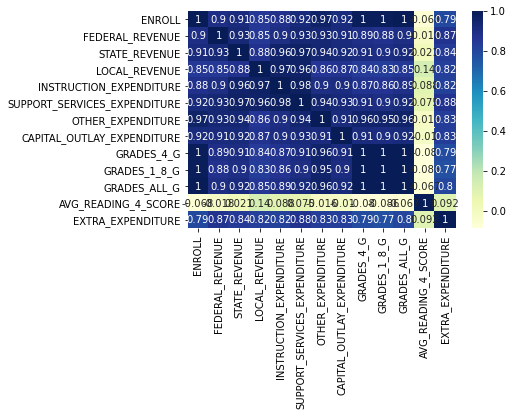

In [37]:
#Correlation matrix to see if anything looks correlated with the 4th grade reading score
sns.heatmap(grade_4_reading.corr(), cmap="YlGnBu", annot = True)
plt.show()

The R2 value from my model was very low (0.19) and the accuracy was very low as well. The RMSE and MAE were high. Standardizing the values, and switching to a lasso regression did not increase the R2 values but increased accuracy to 18%. All of these metrics indicate that this is not a very good model to predict the average reading score for 4th graders based on the variables in the dataset. I created a correlation matrix to confirm that while all the predictor variables seem to be correlated with each other, the Avg_reading_4_score, our target variable, has low correlation with all other variables.

From this exercise, I learned that a linear regression model is not a good model choice for this particular dataset when trying to predict average 4th grade reading scores. That model was not improved when scaling the features or when changing the model to a lasso regression even though I thought there was high multicollinearity in the dataset.

<center> Final Project Additional Models

Because the above model was not complete for all 4 score metrics (it was only 1 of 4 scores) and it was not accurate, I added linear regression models for 4th grade math scores, 8th grade math scores, and 8th grade reading scores. Because of the low R2 values, I created a random forest regressor model for each score to see if the accuracy increased.

In [48]:
##### 4th grade math
#drop columns that we don't want to predict by
grade_4_math = final_df.drop(columns=['YEAR','STATE','PRIMARY_KEY','GRADES_PK_G','GRADES_KG_G','GRADES_8_G','GRADES_12_G','GRADES_9_12_G','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])

#drop all rows with NA (this should only be in the reading score column since we took care of all other NAs)
grade_4_math = grade_4_math.dropna()


# Creating an object of Linear Regression
lm = LinearRegression()

#create input (x) and output (y)
y= grade_4_math.AVG_MATH_4_SCORE
x=grade_4_math.drop('AVG_MATH_4_SCORE',axis=1)

#split data
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)

# Fit the model using .fit() method
lm.fit(x_train, y_train)

# Making Predictions of y_value
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)


# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.21630000855393472
0.28816704142155947


In [49]:
#### 8th grade math
#drop columns that we don't want to predict by
grade_8_math = final_df.drop(columns=['YEAR','STATE','PRIMARY_KEY','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_12_G','GRADES_9_12_G','AVG_MATH_4_SCORE','AVG_READING_8_SCORE','AVG_READING_4_SCORE'])

#drop all rows with NA (this should only be in the reading score column since we took care of all other NAs)
grade_8_math = grade_8_math.dropna()


# Creating an object of Linear Regression
lm = LinearRegression()

#create input (x) and output (y)
y= grade_8_math.AVG_MATH_8_SCORE
x=grade_8_math.drop('AVG_MATH_8_SCORE',axis=1)

#split data
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)

# Fit the model using .fit() method
lm.fit(x_train, y_train)

# Making Predictions of y_value
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)


# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.1963368996432101
0.14531049173169874


In [50]:
#### 8th grade reading
#drop columns that we don't want to predict by
grade_8_reading = final_df.drop(columns=['YEAR','STATE','PRIMARY_KEY','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_12_G','GRADES_9_12_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE'])

#drop all rows with NA (this should only be in the reading score column since we took care of all other NAs)
grade_8_reading = grade_8_reading.dropna()


# Creating an object of Linear Regression
lm = LinearRegression()

#create input (x) and output (y)
y= grade_8_reading.AVG_READING_8_SCORE
x=grade_8_reading.drop('AVG_READING_8_SCORE',axis=1)

#split data
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)

# Fit the model using .fit() method
lm.fit(x_train, y_train)

# Making Predictions of y_value
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.17259175035511298
0.23524232236609255


In [64]:
#Random forset model - 4th grade reading

#create input (x) and output (y)
y= grade_4_reading.AVG_READING_4_SCORE
x=grade_4_reading.drop('AVG_READING_4_SCORE',axis=1)

#import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Check shapes to make sure they're correct
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


feature_list = list(x.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Training Features Shape: (535, 12)
Training Labels Shape: (535,)
Testing Features Shape: (179, 12)
Testing Labels Shape: (179,)
Mean Absolute Error: 3.74
Accuracy: 98.25 %.
Variable: EXTRA_EXPENDITURE    Importance: 0.17
Variable: GRADES_4_G           Importance: 0.13
Variable: LOCAL_REVENUE        Importance: 0.11
Variable: GRADES_1_8_G         Importance: 0.09
Variable: STATE_REVENUE        Importance: 0.08
Variable: GRADES_ALL_G         Importance: 0.08
Variable: ENROLL               Importance: 0.07
Variable: FEDERAL_REVENUE      Importance: 0.07
Variable: OTHER_EXPENDITURE    Importance: 0.06
Variable: INSTRUCTION_EXPENDITURE Importance: 0.05
Variable: CAPITAL_OUTLAY_EXPENDITURE Importance: 0.05
Variable: SUPPORT_SERVICES_EXPENDITURE Importance: 0.03


In [76]:
#Random forset model - 4th grade math

#create input (x) and output (y)
y= grade_4_math.AVG_MATH_4_SCORE
x=grade_4_math.drop('AVG_MATH_4_SCORE',axis=1)

#import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Check shapes to make sure they're correct
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


feature_list = list(x.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Training Features Shape: (497, 12)
Training Labels Shape: (497,)
Testing Features Shape: (166, 12)
Testing Labels Shape: (166,)
Mean Absolute Error: 6.17
Accuracy: 97.29 %.
Variable: EXTRA_EXPENDITURE    Importance: 0.2
Variable: GRADES_4_G           Importance: 0.12
Variable: GRADES_ALL_G         Importance: 0.11
Variable: GRADES_1_8_G         Importance: 0.09
Variable: ENROLL               Importance: 0.08
Variable: FEDERAL_REVENUE      Importance: 0.08
Variable: LOCAL_REVENUE        Importance: 0.07
Variable: STATE_REVENUE        Importance: 0.06
Variable: INSTRUCTION_EXPENDITURE Importance: 0.06
Variable: OTHER_EXPENDITURE    Importance: 0.05
Variable: SUPPORT_SERVICES_EXPENDITURE Importance: 0.04
Variable: CAPITAL_OUTLAY_EXPENDITURE Importance: 0.03


In [66]:
#Random forset model - 8th grade reading

#create input (x) and output (y)
y= grade_8_reading.AVG_READING_8_SCORE
x=grade_8_reading.drop('AVG_READING_8_SCORE',axis=1)

#import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Check shapes to make sure they're correct
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


feature_list = list(x.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Training Features Shape: (497, 12)
Training Labels Shape: (497,)
Testing Features Shape: (166, 12)
Testing Labels Shape: (166,)
Mean Absolute Error: 2.31
Accuracy: 99.12 %.
Variable: EXTRA_EXPENDITURE    Importance: 0.17
Variable: ENROLL               Importance: 0.12
Variable: STATE_REVENUE        Importance: 0.12
Variable: GRADES_1_8_G         Importance: 0.11
Variable: GRADES_ALL_G         Importance: 0.11
Variable: GRADES_8_G           Importance: 0.09
Variable: LOCAL_REVENUE        Importance: 0.08
Variable: FEDERAL_REVENUE      Importance: 0.06
Variable: OTHER_EXPENDITURE    Importance: 0.05
Variable: CAPITAL_OUTLAY_EXPENDITURE Importance: 0.05
Variable: INSTRUCTION_EXPENDITURE Importance: 0.03
Variable: SUPPORT_SERVICES_EXPENDITURE Importance: 0.02


In [63]:
#Random forset model - 8th grade math

#create input (x) and output (y)
y= grade_8_math.AVG_MATH_8_SCORE
x=grade_8_math.drop('AVG_MATH_8_SCORE',axis=1)

#import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Check shapes to make sure they're correct
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

feature_list = list(x.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Training Features Shape: (497, 12)
Training Labels Shape: (497,)
Testing Features Shape: (166, 12)
Testing Labels Shape: (166,)
Mean Absolute Error: 5.03
Accuracy: 98.16 %.
Variable: EXTRA_EXPENDITURE    Importance: 0.22
Variable: GRADES_ALL_G         Importance: 0.16
Variable: ENROLL               Importance: 0.1
Variable: GRADES_8_G           Importance: 0.1
Variable: GRADES_1_8_G         Importance: 0.08
Variable: STATE_REVENUE        Importance: 0.07
Variable: LOCAL_REVENUE        Importance: 0.06
Variable: OTHER_EXPENDITURE    Importance: 0.05
Variable: FEDERAL_REVENUE      Importance: 0.04
Variable: INSTRUCTION_EXPENDITURE Importance: 0.04
Variable: SUPPORT_SERVICES_EXPENDITURE Importance: 0.03
Variable: CAPITAL_OUTLAY_EXPENDITURE Importance: 0.03
